TESLA STOCK PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
!pip install chart-studio


In [2]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
tesla = pd.read_csv("C:\\Users\\khush\\Downloads\\datasetsandcodefilesstockmarketprediction\\tesla.csv")

In [4]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [5]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [6]:
tesla['Date'] = pd.to_datetime(tesla['Date'])

C:\Users\khush\AppData\Local\Temp\ipykernel_20832\3702129700.py:1: UserWarning:

Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [7]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days = {(tesla.Date.max()  - tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2019-03-15 00:00:00
Total days = 3181 days


In [8]:
tesla.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2193,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,2014-11-04 14:37:15.841313024,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,2012-08-29 00:00:00,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,2014-11-04 00:00:00,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,2017-01-09 00:00:00,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,2019-03-15 00:00:00,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07
std,NaN,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06


<Axes: >

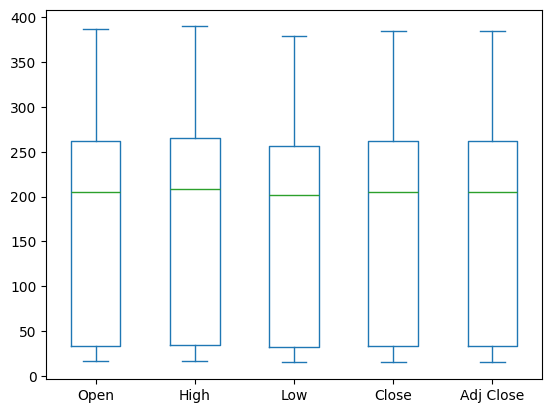

In [9]:
tesla[['Open', 'High', 'Low', 'Close','Adj Close']].plot(kind= 'box')

In [10]:
#setting the layout for our plot

layout = go.Layout(
    title = 'Stock Price Of Tesla',
    xaxis = dict(
        title = 'Date',
        titlefont = dict(
            family = 'Courier New, Monospace',
            size = 18,
            color = '#7f7f7f'
        )
    ),

    yaxis = dict(
        title = 'Price',
        titlefont = dict(
            family = 'Courier New, Monospace',
            size = 18,
            color = '#7f7f7f'
        )
        
    )
)

tesla_data = [{'x':tesla['Date'],  'y':tesla['Close']}]
plot = go.Figure(data = tesla_data, layout = layout)

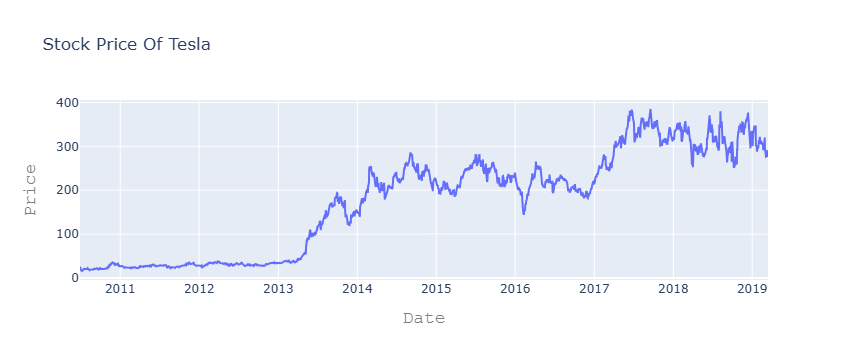

In [11]:
#plotting offline
iplot(plot)

In [11]:
#Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evolution 
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score


In [12]:
#split data into train and test split
X = np.array(tesla.index).reshape(-1,1)
Y = tesla['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 101)

In [13]:
#feature scaling
scaler = StandardScaler().fit(X_train)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
#creating a linear model

lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [16]:
#plot actual and predicted values for train dataset
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
tesla_data = [trace0,trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=tesla_data, layout=layout)

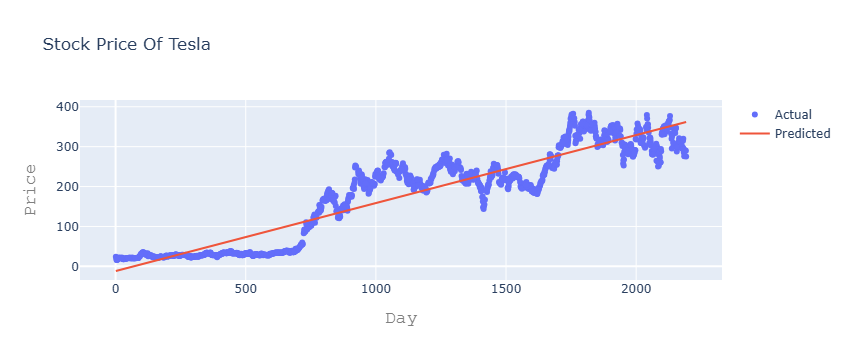

In [17]:
iplot(plot2)

In [19]:
#calculate scores for model evalution

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.8658871776828707	0.8610649253244574
MSE       1821.3833862936174	1780.987539418845



GOOGLE STOCK PRICE PREDICTION

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [21]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [23]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [25]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [26]:
X_train = []
Y_train = []

for i in range (60,1149):   #60 : timestamp // 1149 : length of data
    X_train.append(trainData[i-60:i,0])
    Y_train.append(trainData[i,0])

X_train,Y_train  = np.array(X_train),np.array(Y_train)

In [27]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #addingg the batch size axis
X_train.shape

(1089, 60, 1)

In [28]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer = 'adam', loss = "mean_squared_error")


C:\Users\khush\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [29]:
hist = model.fit(X_train, Y_train, epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
35/35 - 20s - 584ms/step - loss: 0.0392
Epoch 2/20
35/35 - 7s - 203ms/step - loss: 0.0112
Epoch 3/20
35/35 - 7s - 202ms/step - loss: 0.0091
Epoch 4/20
35/35 - 7s - 207ms/step - loss: 0.0090
Epoch 5/20
35/35 - 7s - 205ms/step - loss: 0.0078
Epoch 6/20
35/35 - 7s - 202ms/step - loss: 0.0076
Epoch 7/20
35/35 - 7s - 208ms/step - loss: 0.0082
Epoch 8/20
35/35 - 7s - 204ms/step - loss: 0.0067
Epoch 9/20
35/35 - 7s - 207ms/step - loss: 0.0063
Epoch 10/20
35/35 - 7s - 214ms/step - loss: 0.0068
Epoch 11/20
35/35 - 7s - 210ms/step - loss: 0.0061
Epoch 12/20
35/35 - 7s - 208ms/step - loss: 0.0081
Epoch 13/20
35/35 - 7s - 206ms/step - loss: 0.0063
Epoch 14/20
35/35 - 7s - 204ms/step - loss: 0.0061
Epoch 15/20
35/35 - 7s - 209ms/step - loss: 0.0079
Epoch 16/20
35/35 - 7s - 206ms/step - loss: 0.0053
Epoch 17/20
35/35 - 7s - 207ms/step - loss: 0.0054
Epoch 18/20
35/35 - 7s - 201ms/step - loss: 0.0058
Epoch 19/20
35/35 - 8s - 241ms/step - loss: 0.0048
Epoch 20/20
35/35 - 8s - 242ms/step - l

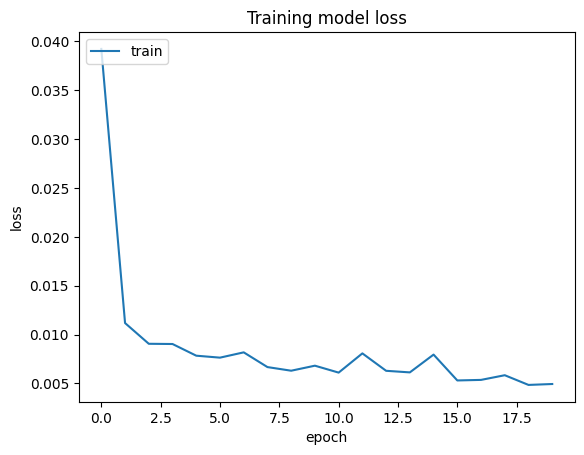

In [30]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [31]:
testdata = pd.read_csv('Google_test_data.csv')
testdata.head()
testdata["Close"]=pd.to_numeric(testdata.Close,errors='coerce')
testdata = testdata.dropna()
testdata = testdata.iloc[:,4:5]
Y_test = testdata.iloc[60:,0:].values
#input array for the model
inputClosing = testdata.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test=[]
length = len(testdata)
timestep = 60
for i in range(timestep,length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [33]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step


array([[1.1109842],
       [1.1129599],
       [1.1231492],
       [1.1388427],
       [1.1519709],
       [1.1531903],
       [1.1426427],
       [1.1271666],
       [1.1167741],
       [1.1135144],
       [1.1070648],
       [1.0965934],
       [1.0869815],
       [1.0780072],
       [1.0754129],
       [1.0787739],
       [1.0943936],
       [1.1197325],
       [1.1493465],
       [1.1793717],
       [1.1930159],
       [1.1921932],
       [1.1756023],
       [1.1502095],
       [1.1263067],
       [1.1116432],
       [1.1067727],
       [1.1048646],
       [1.0974017],
       [1.0868337],
       [1.0753603],
       [1.0625618],
       [1.0439652],
       [1.0211353],
       [1.0111281],
       [1.0185336],
       [1.0374593],
       [1.0598938],
       [1.0818919],
       [1.0941843],
       [1.1065989],
       [1.1212666],
       [1.1380181],
       [1.153701 ],
       [1.1646805],
       [1.1670158],
       [1.1590428],
       [1.1512269],
       [1.1486276],
       [1.1531011],


In [34]:
predicted_price = sc.inverse_transform(y_pred)

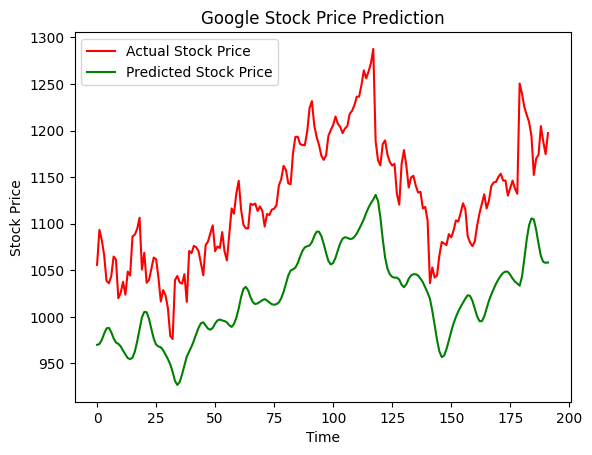

In [36]:
plt.plot(Y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()